In [141]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score, accuracy_score

In [142]:
import seaborn as sns
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

In [3]:
dg = pd.read_pickle('dane_gotowe.pkl')

In [4]:
dg

Site             datetime  Time  Month    V_MIN    V_MAX  \
0     Forest Road  2013-12-09 22:00:00    22     12  244.254  245.834   
1     Forest Road  2013-12-09 23:00:00    23     12  243.588  246.049   
2     Forest Road  2013-12-10 00:00:00     0     12  243.614  245.499   
3     Forest Road  2013-12-10 01:00:00     1     12  244.194  245.570   
4     Forest Road  2013-12-10 02:00:00     2     12  243.976  246.128   
...           ...                  ...   ...    ...      ...      ...   
5676  Forest Road  2014-10-03 06:00:00     6     10  241.084  242.461   
5677  Forest Road  2014-10-03 07:00:00     7     10  240.792  243.230   
5678  Forest Road  2014-10-03 08:00:00     8     10  241.843  242.688   
5679  Forest Road  2014-10-03 09:00:00     9     10  241.917  242.804   
5680  Forest Road  2014-10-03 10:00:00    10     10  242.192  243.586   

      I_GEN_MIN  I_GEN_MAX  I_IMPORT_MIN  I_IMPORT_MAX  ...  InHum  InDew  \
0         0.883      0.953         0.971         1.516  ...   56.0    3.2   
1         0.876      0.949         0.969         1.123  ...   56.0    2.9   
2         0.881      0.974         0.977         1.095  ...   56.0    2.7   
3         0.884      0.958         0.984         1.096  ...   56.0    2.6   
4         0.906      0.954         0.977         1.112  ...   56.0    2.4   
...         ...        ...           ...           ...  ...    ...    ...   
5676      0.858      0.877         1.138         1.175  ...   57.0   11.0   
5677      0.859      1.093         1.326        13.153  ...   58.0   11.3   
5678      1.086      1.554         1.397         1.638  ...   58.0   11.3   
5679      1.555      4.507         1.579         4.118  ...   58.0   11.3   
5680      4.434      6.550         4.392         5.928  ...   59.0   11.7   

      InHeat  InEMC  InAirDensity    ET  WindSamp  WindTx  ISSRecept  ArcInt  
0       10.9  10.41        0.0779  0.00     464.0     1.0       67.8    30.0  
1       10.7  10.40        0.0780  0.00     703.0     1.0      100.0    30.0  
2       10.5  10.39        0.0780  0.00     703.0     1.0      100.0    30.0  
3       10.4  10.39        0.0781  0.00     701.0     1.0      100.0    30.0  
4       10.2  10.38        0.0782  0.00     701.0     1.0      100.0    30.0  
...      ...    ...           ...   ...       ...     ...        ...     ...  
5676    19.4  10.60        0.0749  0.00     697.0     3.0      100.0    30.0  
5677    19.6  10.75        0.0748  0.00     702.0     3.0      100.0    30.0  
5678    19.4  10.75        0.0748  0.00     702.0     3.0      100.0    30.0  
5679    19.4  10.75        0.0748  0.03     702.0     2.0      100.0    30.0  
5680    19.7  10.95        0.0747  0.00     703.0     1.0      100.0    30.0  

[5681 rows x 62 columns]

In [5]:
dg.columns

Index(['Site', 'datetime', 'Time', 'Month', 'V_MIN', 'V_MAX', 'I_GEN_MIN',
       'I_GEN_MAX', 'I_IMPORT_MIN', 'I_IMPORT_MAX', 'P_GEN_MIN', 'P_GEN_MAX',
       'P_IMPORT_MIN', 'P_IMPORT_MAX', 'Q_GEN_MIN', 'Q_GEN_MAX',
       'Q_IMPORT_MIN', 'Q_IMPORT_MAX', 'S_GEN_MIN', 'S_GEN_MAX',
       'S_IMPORT_MIN', 'S_IMPORT_MAX', 'thdV_MIN', 'thdV_MAX', 'thdI_GEN_MIN',
       'thdI_GEN_MAX', 'thdI_IMPORT_MIN', 'thdI_IMPORT_MAX', 'f_min', 'f_max',
       'TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt', 'WindSpeed',
       'WindDir', 'WindRun', 'HiSpeed', 'HiDir', 'WindChill', 'HeatIndex',
       'THWIndex', 'Bar', 'Rain', 'RainRate', 'SolarRad', 'SolarEnergy',
       'HiSolarRad', 'HeatD-D', 'CoolD-D', 'InTemp', 'InHum', 'InDew',
       'InHeat', 'InEMC', 'InAirDensity', 'ET', 'WindSamp', 'WindTx',
       'ISSRecept', 'ArcInt'],
      dtype='object')

Looking one more time on PV data to recognize if there are any strong correlations which would suggest that some columns should be excluded. 

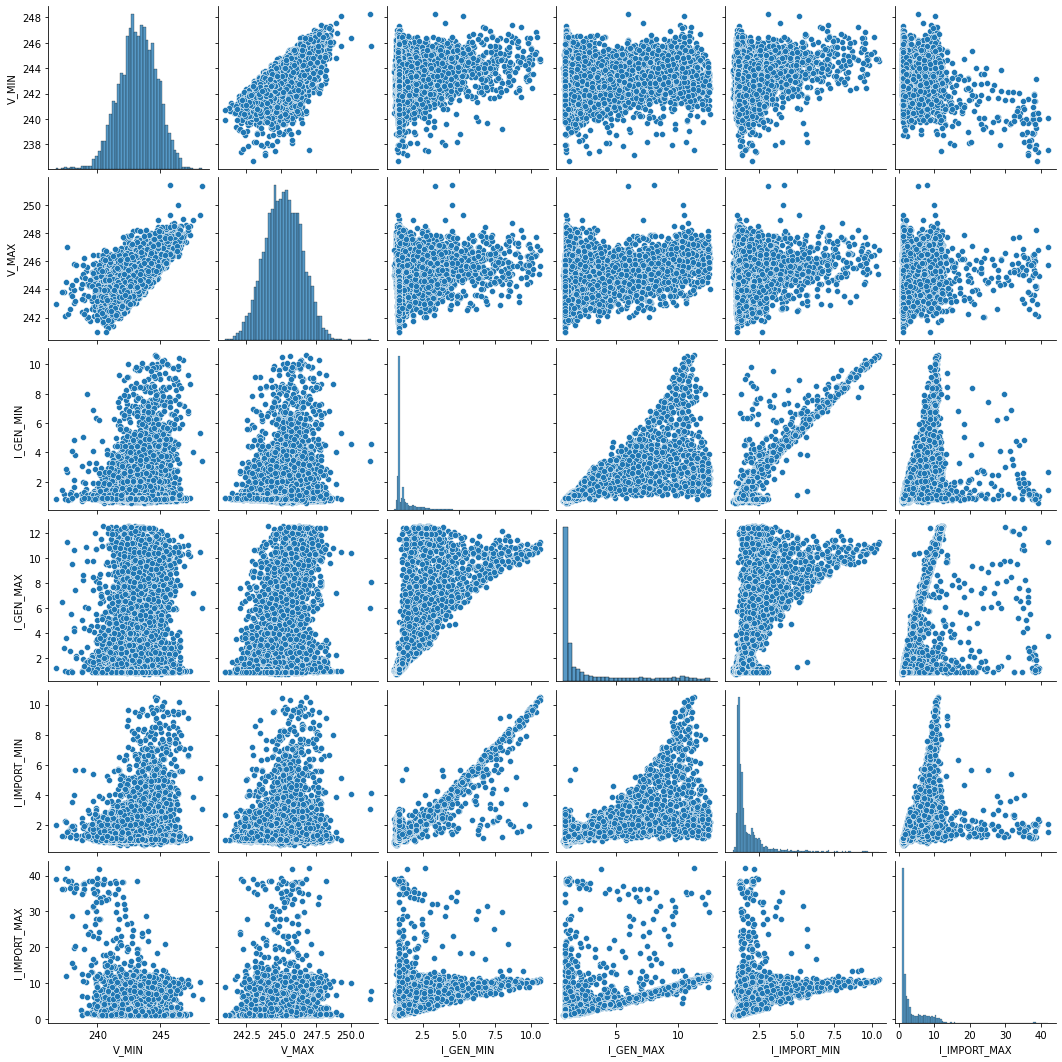

In [6]:
sns.pairplot(dg.iloc[:,4:10])

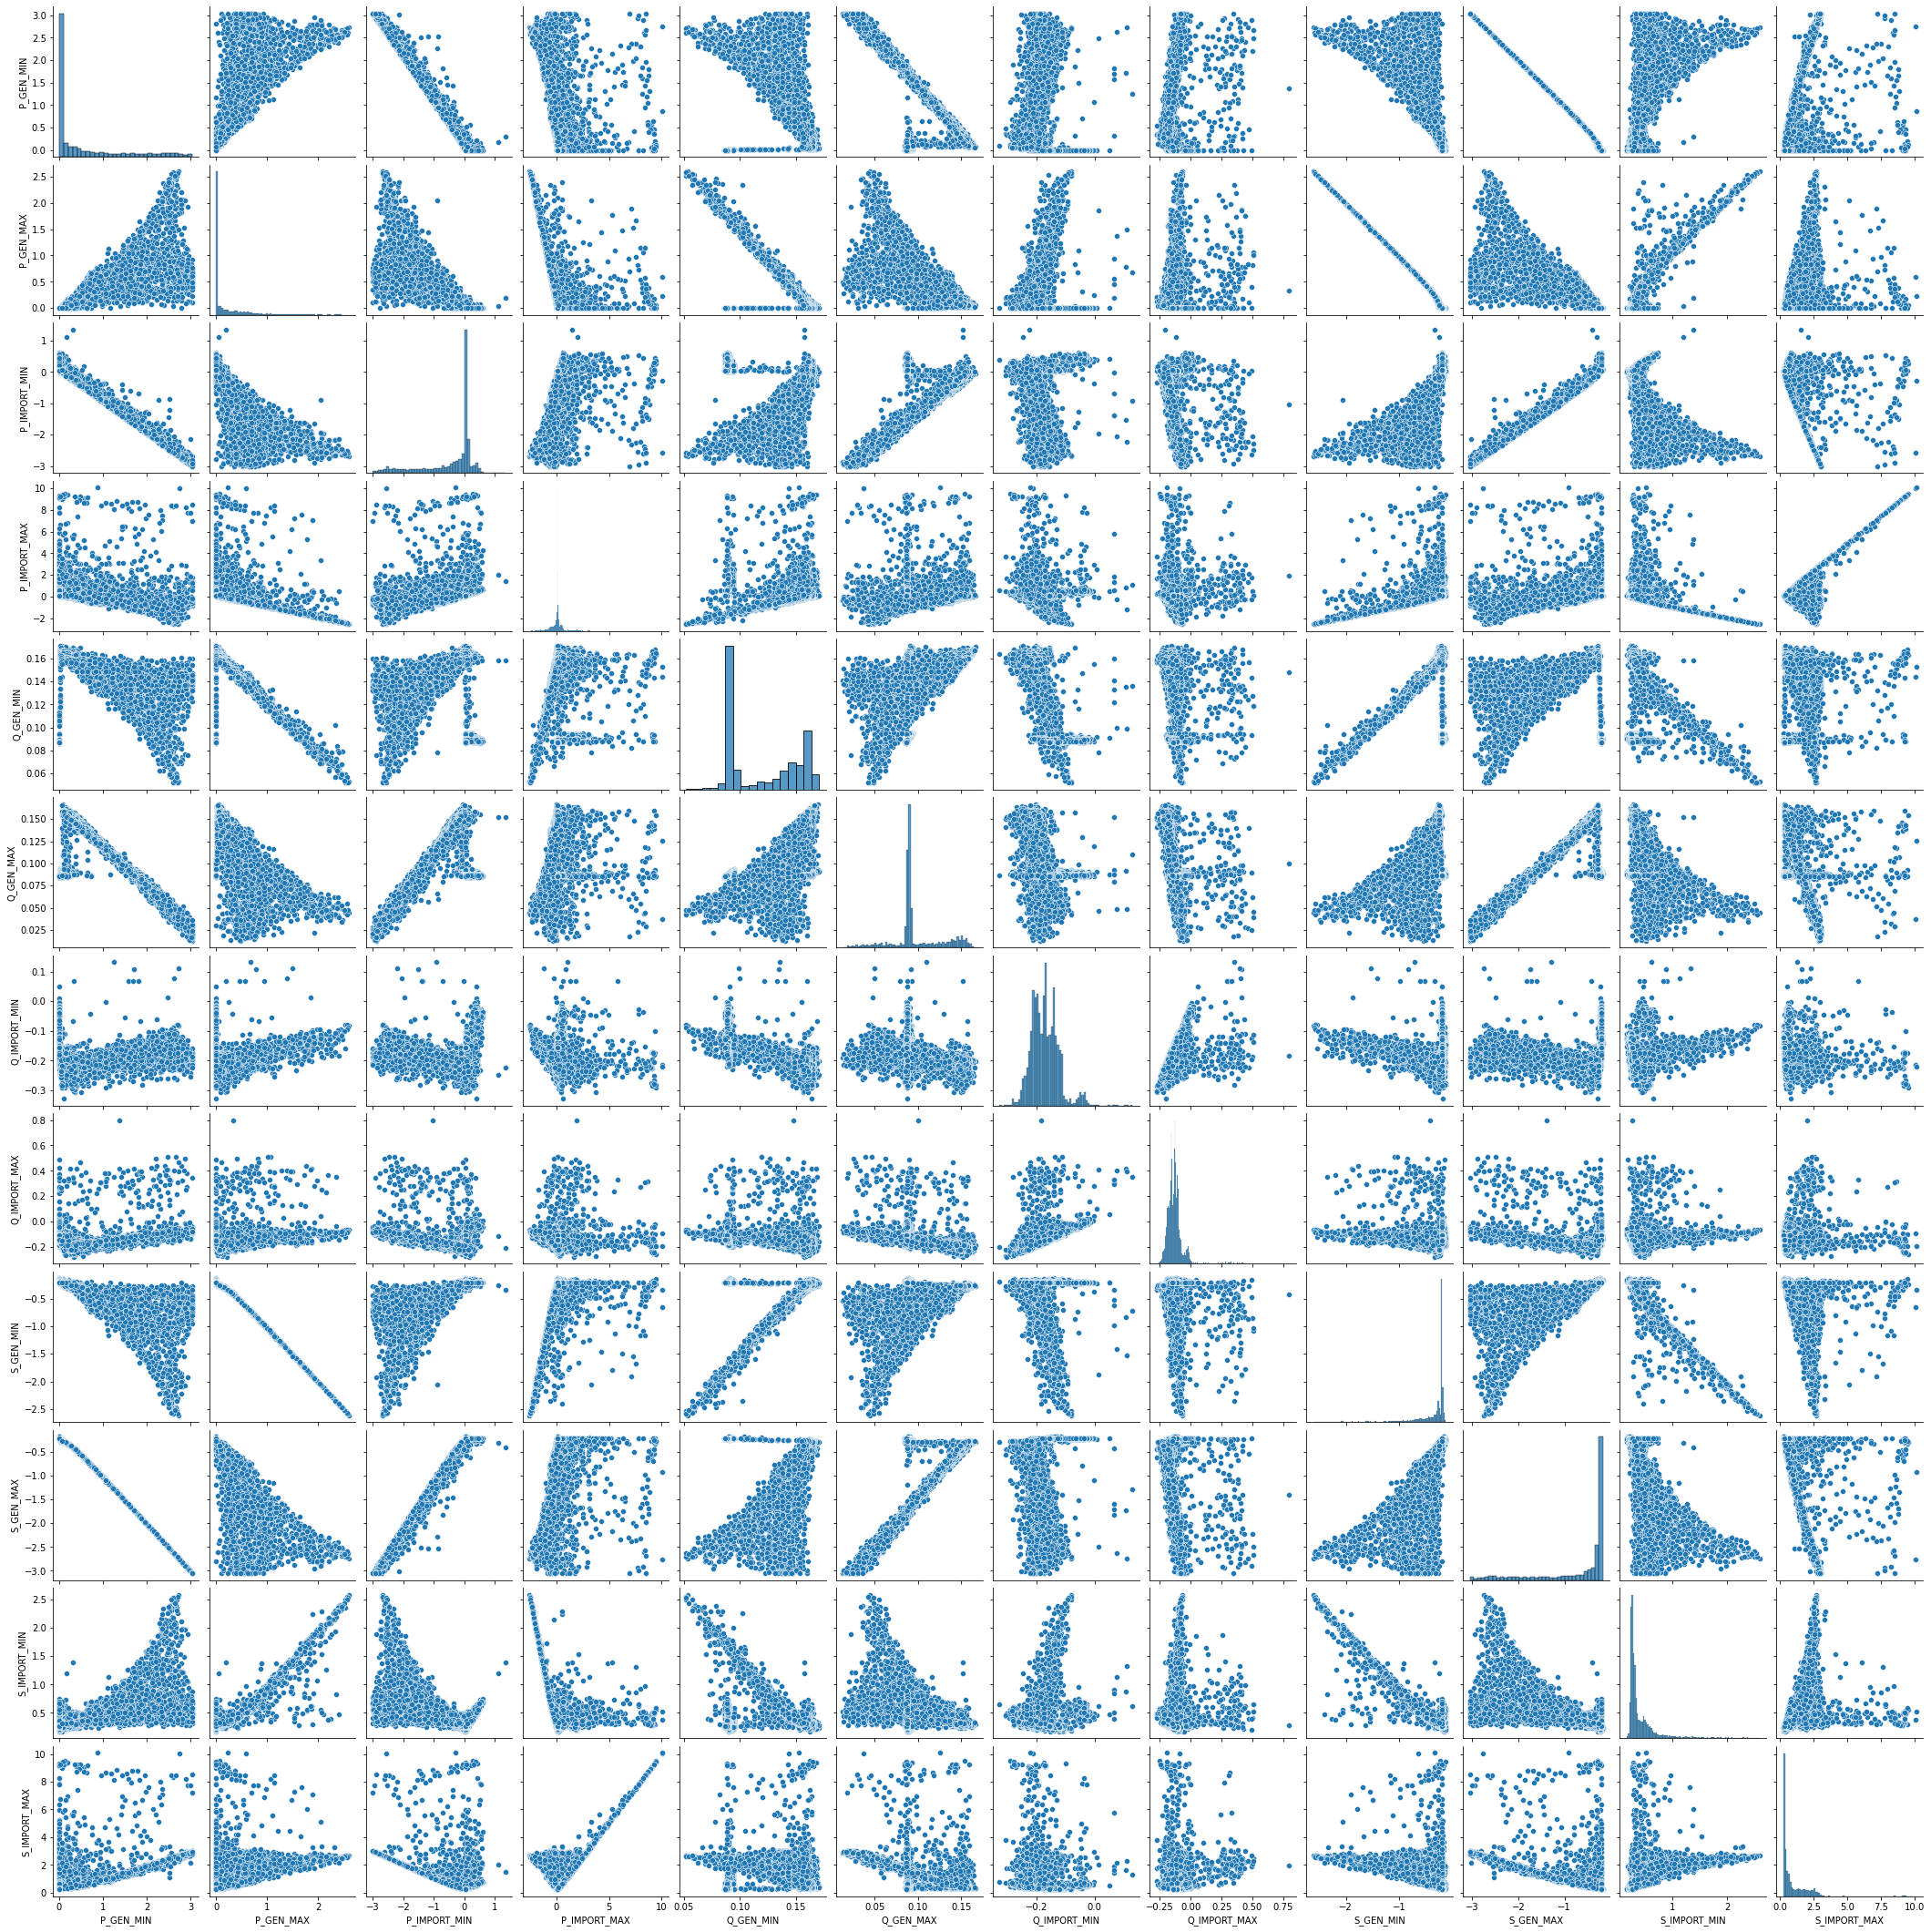

In [7]:
sns.pairplot(dg.iloc[:, 10:22])

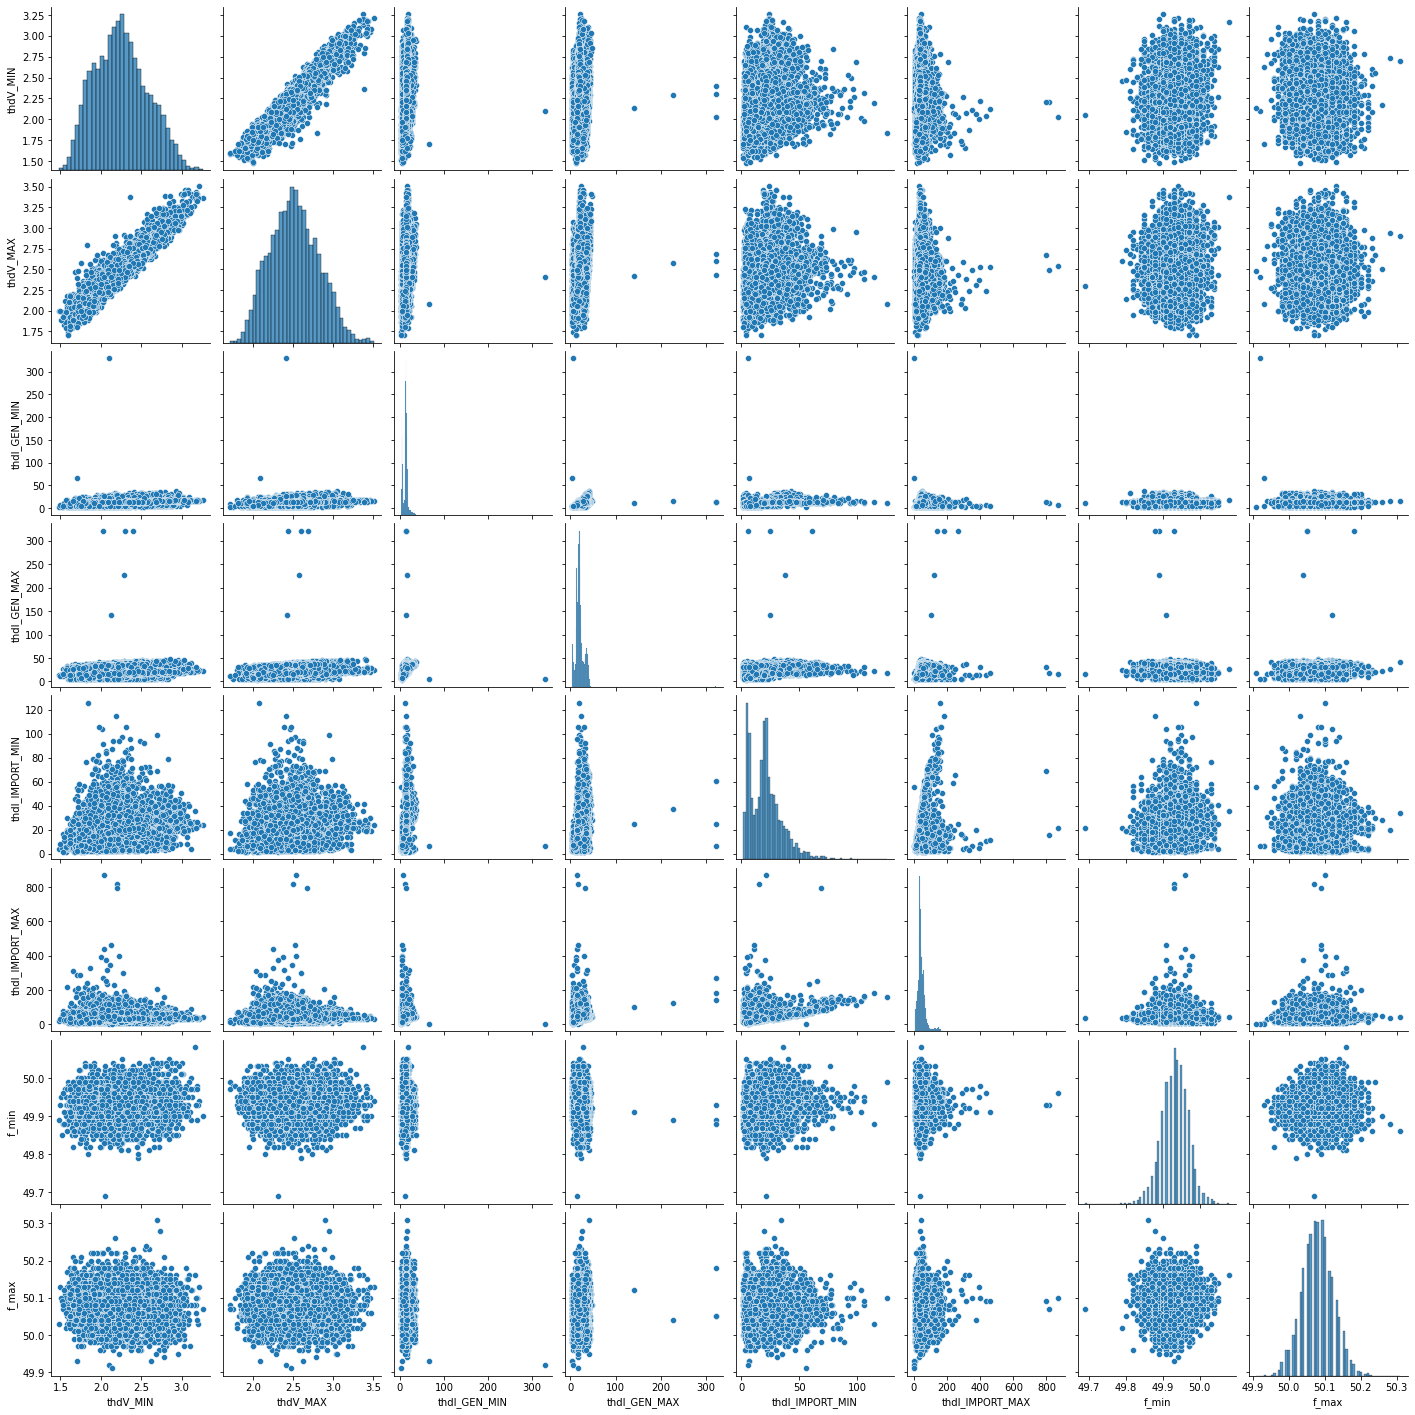

In [8]:
sns.pairplot(dg.iloc[:, 22:30])

Replacing categorical columns 'WindDir' and 'HiDir' with numerical data. 

In [9]:
len(dg.WindDir.unique())

17

In [10]:
dg.HiDir.unique()

array(['WSW', 'NW', 'W', 'WNW', 'SW', '---', 'S', 'SSE', 'NNW', 'E',
       'ESE', 'ENE', 'N', 'SE', 'NNE', 'NE', 'SSW'], dtype=object)

In [11]:
wind_dir = {'WSW':0, 'NW':1, 'W':2, 'WNW':3, 'SW':4, '---':5, 'S':6, 'SSE':7, 'NNW':8, 'E':9,
       'ESE':10, 'ENE':11, 'N':12, 'SE':13, 'NNE':14, 'NE':15, 'SSW':16}
wind_dir

{'WSW': 0,
 'NW': 1,
 'W': 2,
 'WNW': 3,
 'SW': 4,
 '---': 5,
 'S': 6,
 'SSE': 7,
 'NNW': 8,
 'E': 9,
 'ESE': 10,
 'ENE': 11,
 'N': 12,
 'SE': 13,
 'NNE': 14,
 'NE': 15,
 'SSW': 16}

In [12]:
dg.WindDir.replace(wind_dir)

0       2
1       1
2       0
3       1
4       3
       ..
5676    3
5677    8
5678    3
5679    7
5680    3
Name: WindDir, Length: 5681, dtype: int64

In [13]:
dg['WindDir_new'] = dg.WindDir.replace(wind_dir)

In [14]:
dg['HiDir_new'] = dg.HiDir.replace(wind_dir)

In [15]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Site             5681 non-null   object 
 1   datetime         5681 non-null   object 
 2   Time             5681 non-null   int32  
 3   Month            5681 non-null   int64  
 4   V_MIN            5681 non-null   float64
 5   V_MAX            5681 non-null   float64
 6   I_GEN_MIN        5681 non-null   float64
 7   I_GEN_MAX        5681 non-null   float64
 8   I_IMPORT_MIN     5681 non-null   float64
 9   I_IMPORT_MAX     5681 non-null   float64
 10  P_GEN_MIN        5681 non-null   float64
 11  P_GEN_MAX        5681 non-null   float64
 12  P_IMPORT_MIN     5681 non-null   float64
 13  P_IMPORT_MAX     5681 non-null   float64
 14  Q_GEN_MIN        5681 non-null   float64
 15  Q_GEN_MAX        5681 non-null   float64
 16  Q_IMPORT_MIN     5681 non-null   float64
 17  Q_IMPORT_MAX  

# Optimizing the simplest linear regression model according to weather data for later comparison to weather and PV data model scoring.

In [57]:
#X = dg.drop(columns=['Site','datetime','P_GEN_MIN', 'P_GEN_MAX', 'WindDir', 'HiDir'])
X = dg.drop(columns=['Site','datetime', 'WindDir', 'HiDir',
                     'V_MIN', 'V_MAX', 
                     'I_GEN_MIN','I_GEN_MAX', 
                     'I_IMPORT_MIN', 'I_IMPORT_MAX', 
                     'P_GEN_MIN', 'P_GEN_MAX',
                     'P_IMPORT_MIN', 'P_IMPORT_MAX', 
                     'Q_GEN_MIN', 'Q_GEN_MAX',
                     'Q_IMPORT_MIN', 'Q_IMPORT_MAX', 
                     'S_GEN_MIN', 'S_GEN_MAX',
                     'S_IMPORT_MIN', 'S_IMPORT_MAX', 
                     'thdV_MIN', 'thdV_MAX', 
                     'thdI_GEN_MIN','thdI_GEN_MAX', 
                     'thdI_IMPORT_MIN', 'thdI_IMPORT_MAX', 
                     'f_min', 'f_max'
                    ])
y = dg['P_GEN_MAX']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [59]:
sc = StandardScaler()
X_tr = sc.fit_transform(X_train)
X_te = sc.transform(X_test)

In [61]:
grid = GridSearchCV(Pipeline([('PolF', PolynomialFeatures()), ('LR',LinearRegression())]), 
                    #param_grid = {'lasso__alpha':[0.001,0.01]}, 
                    param_grid = {'PolF__degree':[1,2,3]},
                    cv = 5, scoring = 'r2')
grid.fit(X_tr, y_train)
print(grid.best_params_)
gbs = grid.best_score_
print(f'The best score on training set: {gbs}')
trbs = r2_score(y_test, grid.predict(X_te))
print(f'Score on the test set: {trbs}')
print(grid.best_estimator_)
pd.DataFrame(grid.cv_results_)

{'PolF__degree': 1}
The best score on training set: 0.7087198702905764
Score on the test set: 0.7149788056828941
Pipeline(steps=[('PolF', PolynomialFeatures(degree=1)),
                ('LR', LinearRegression())])


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.007779      0.000400         0.001593        0.000495   
1       0.174317      0.007055         0.005994        0.000016   
2      27.739652      1.185034         0.078607        0.019617   

  param_PolF__degree               params  split0_test_score  \
0                  1  {'PolF__degree': 1}           0.718096   
1                  2  {'PolF__degree': 2}           0.363193   
2                  3  {'PolF__degree': 3}     -152064.443191   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0       6.866514e-01           0.672920           0.724906           0.741026   
1      -4.561482e+19           0.728468           0.011493           0.716173   
2      -5.792616e+07        -964.976172       -1065.397055         -63.795062   

   mean_test_score  std_test_score  rank_test_score  
0     7.087199e-01    2.514840e-02                1  
1    -9.122964e+18    1.824593e+19                3  
2    -1.161606e+07    2.315512e+07                2

In [50]:
len(grid.best_estimator_.named_steps['LR'].coef_)

35

In [51]:
pd.DataFrame(grid.best_estimator_.named_steps['LR'].coef_[1:], index = X.columns)

0
Time          -0.024589
Month         -0.006696
TempOut       -0.392660
HiTemp        -0.078161
LowTemp       -0.725228
OutHum        -0.254082
DewPt          0.353426
WindSpeed      0.001461
WindRun        0.001461
HiSpeed        0.014497
WindChill      0.654949
HeatIndex      0.444312
THWIndex      -0.339199
Bar            0.045191
Rain           0.006593
RainRate      -0.000619
SolarRad     -21.697611
SolarEnergy   22.093694
HiSolarRad    -0.092370
HeatD-D       -0.165860
CoolD-D        0.047998
InTemp        -0.106465
InHum         -0.241498
InDew         -0.012598
InHeat        -0.089452
InEMC          0.246394
InAirDensity  -0.030572
ET            -0.012854
WindSamp       0.031386
WindTx        -0.004300
ISSRecept     -0.027946
ArcInt         0.000000
WindDir_new   -0.001579
HiDir_new     -0.001483

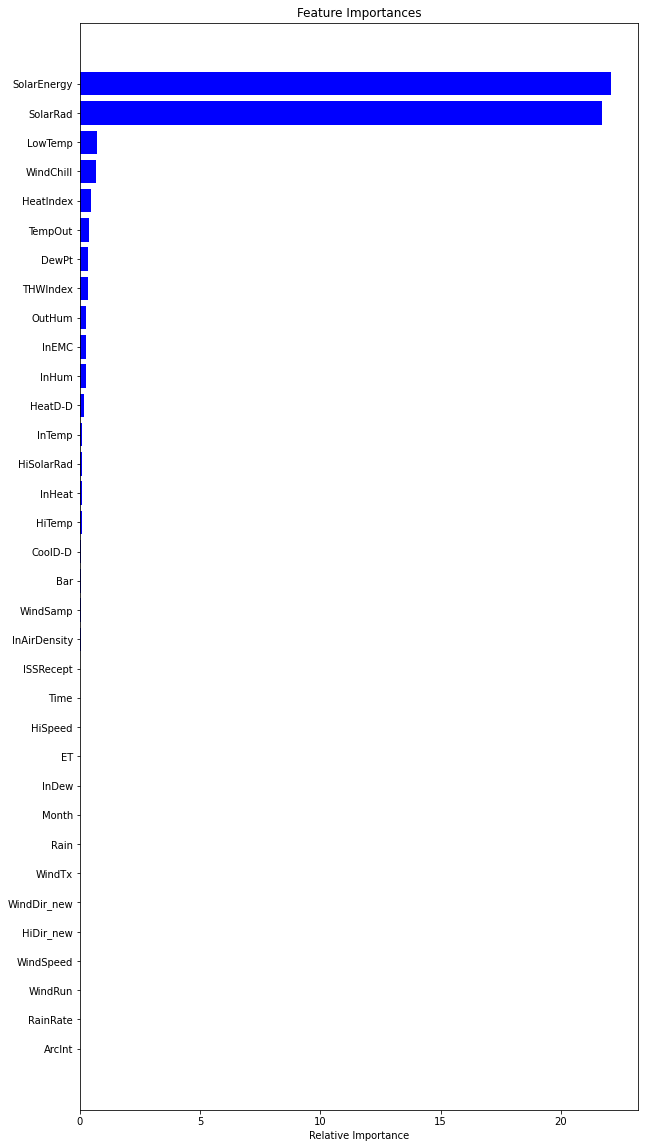

In [52]:
features = X.columns
importances = abs(grid.best_estimator_.named_steps['LR'].coef_[1:])
indices = np.argsort(importances)

plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Test for weather and PV data.

In [19]:
dg.f_min.isna().sum()

3

In [20]:
dg.f_max.isna().sum()

0

In [21]:
dg.shape

(5681, 64)

In [22]:
dg.dropna().shape

(5678, 64)

There were still 3 NaN values in column 'f_min' after merging weather and PV data frames.

In [23]:
dg = dg.dropna()

# For best parameters calculated for model including only weather data (first degree polynomial), model was calculated again including this time also a pair of PV data columns (beside P_GEN_MIN and P_GEN_MAX). R2 scoring was determined each time.

In [114]:
#X = dg.drop(columns=['Site','datetime','P_GEN_MIN', 'P_GEN_MAX', 'WindDir', 'HiDir'])

X = dg.drop(columns=['Site','datetime', 'WindDir', 'HiDir', 
                     'V_MIN', 'V_MAX',
                     'I_GEN_MIN','I_GEN_MAX', 
                     'I_IMPORT_MIN','I_IMPORT_MAX',
                     'P_GEN_MIN', 'P_GEN_MAX',
                     'P_IMPORT_MIN', 'P_IMPORT_MAX', 
                     'Q_GEN_MIN', 'Q_GEN_MAX',
                     'Q_IMPORT_MIN', 'Q_IMPORT_MAX', 
                     'S_GEN_MIN', 'S_GEN_MAX',
                     'S_IMPORT_MIN', 'S_IMPORT_MAX', 
                     'thdV_MIN', 'thdV_MAX', 
                     'thdI_GEN_MIN','thdI_GEN_MAX', 
                     'thdI_IMPORT_MIN', 'thdI_IMPORT_MAX', 
                     #'f_min', 'f_max'
                    ])
y = dg['P_GEN_MAX']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [116]:
sc = StandardScaler()
X_tr = sc.fit_transform(X_train)
X_te = sc.transform(X_test)

In [117]:
grid = GridSearchCV(Pipeline([('PolF', PolynomialFeatures()), ('LR',LinearRegression())]), 
                    #param_grid = {'lasso__alpha':[0.001,0.01]}, 
                    param_grid = {'PolF__degree':[1,2]},
                    cv = 5, scoring = 'r2')
grid.fit(X_tr, y_train)
print(grid.best_params_)
gbs = grid.best_score_
print(f'The best score on training set: {gbs}')
trbs = r2_score(y_test, grid.predict(X_te))
print(f'Score on the test set: {trbs}')
print(grid.best_estimator_)
pd.DataFrame(grid.cv_results_)

{'PolF__degree': 1}
The best score on training set: 0.7105292345306667
Score on the test set: 0.7176265463456507
Pipeline(steps=[('PolF', PolynomialFeatures(degree=1)),
                ('LR', LinearRegression())])


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.013799      0.010531         0.000000        0.000000   
1       0.229819      0.025628         0.008032        0.003297   

  param_PolF__degree               params  split0_test_score  \
0                  1  {'PolF__degree': 1}           0.720309   
1                  2  {'PolF__degree': 2}           0.377088   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0       6.891014e-01           0.674414           0.726215           0.742607   
1      -7.178792e+18           0.635068          -0.242292           0.710616   

   mean_test_score  std_test_score  rank_test_score  
0     7.105292e-01    2.503628e-02                1  
1    -1.435758e+18    2.871517e+18                2

In [118]:
len(grid.best_estimator_.named_steps['LR'].coef_)

37

In [119]:
pd.DataFrame(grid.best_estimator_.named_steps['LR'].coef_[1:], index = X.columns)

0
Time          -0.022310
Month         -0.005780
f_min          0.019586
f_max         -0.003163
TempOut       -0.468680
HiTemp        -0.076309
LowTemp       -0.729510
OutHum        -0.251280
DewPt          0.357832
WindSpeed      0.000764
WindRun        0.000764
HiSpeed        0.017078
WindChill      0.627231
HeatIndex      0.387143
THWIndex      -0.327707
Bar            0.017804
Rain           0.006507
RainRate      -0.000461
SolarRad     -15.450750
SolarEnergy   15.856626
HiSolarRad    -0.100488
HeatD-D       -0.290815
CoolD-D        0.095625
InTemp        -0.028356
InHum         -0.159989
InDew         -0.045214
InHeat        -0.085657
InEMC          0.177440
InAirDensity   0.023318
ET            -0.016512
WindSamp       0.036286
WindTx        -0.005291
ISSRecept     -0.032959
ArcInt         0.000000
WindDir_new   -0.001466
HiDir_new     -0.001472

In each case Solar Energy and Solar Radiation were the most important features. 

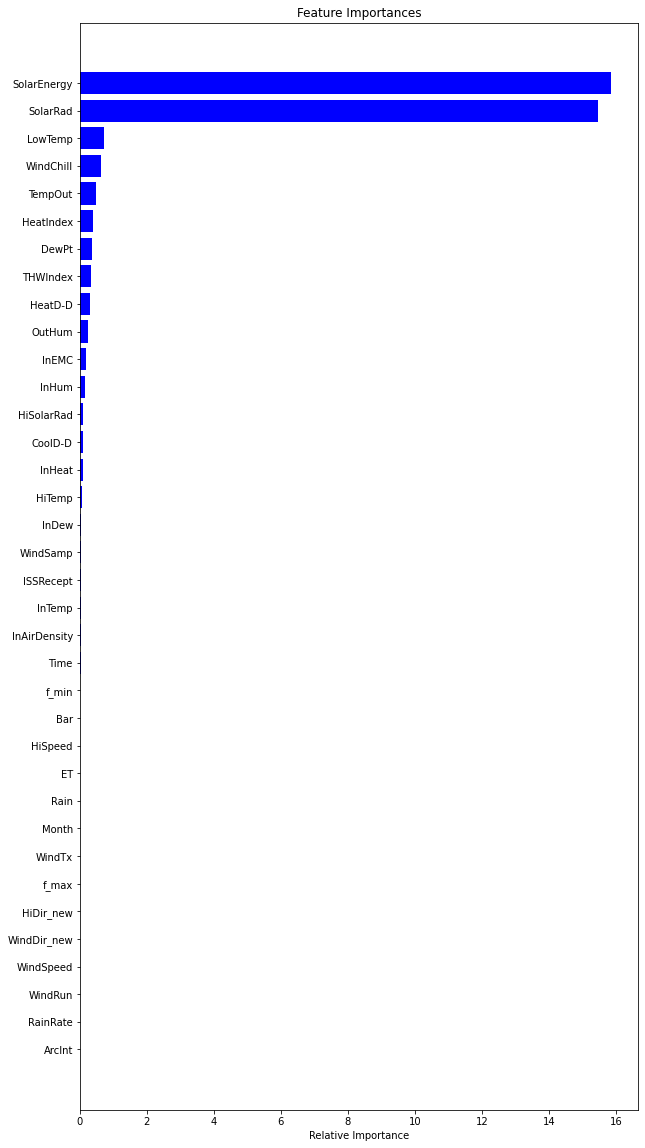

In [120]:
features = X.columns
importances = abs(grid.best_estimator_.named_steps['LR'].coef_[1:])
indices = np.argsort(importances)

plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Evaluation table for weather and PV data.

In [24]:
columns_added = ["Only weather data","'V_MIN', 'V_MAX'", "'I_GEN_MIN','I_GEN_MAX'", "'I_IMPORT_MIN','I_IMPORT_MAX'",
"'P_IMPORT_MIN', 'P_IMPORT_MAX'", "'Q_GEN_MIN', 'Q_GEN_MAX'",
"'Q_IMPORT_MIN', 'Q_IMPORT_MAX'","'S_GEN_MIN', 'S_GEN_MAX'", "'S_IMPORT_MIN', 'S_IMPORT_MAX'",  
"'thdV_MIN', 'thdV_MAX'", "'thdI_GEN_MIN','thdI_GEN_MAX'", "'thdI_IMPORT_MIN', 'thdI_IMPORT_MAX'",  
"'f_min', 'f_max'"]

In [25]:
columns_added

['Only weather data',
 "'V_MIN', 'V_MAX'",
 "'I_GEN_MIN','I_GEN_MAX'",
 "'I_IMPORT_MIN','I_IMPORT_MAX'",
 "'P_IMPORT_MIN', 'P_IMPORT_MAX'",
 "'Q_GEN_MIN', 'Q_GEN_MAX'",
 "'Q_IMPORT_MIN', 'Q_IMPORT_MAX'",
 "'S_GEN_MIN', 'S_GEN_MAX'",
 "'S_IMPORT_MIN', 'S_IMPORT_MAX'",
 "'thdV_MIN', 'thdV_MAX'",
 "'thdI_GEN_MIN','thdI_GEN_MAX'",
 "'thdI_IMPORT_MIN', 'thdI_IMPORT_MAX'",
 "'f_min', 'f_max'"]

In [121]:
pd.DataFrame({'R2_score_training':[70.9,71.3,99.6,90.1,75.7,74.3,72.4,99.6,90.1,71.2,72.6,72.5,71.0],'R2_score_test':[71.5,71.7,99.6,90.8,75.0,74.8,73.2,99.6,90.8,71.8,74.4,73.0,71.8]}, index = columns_added )

R2_score_training  R2_score_test
Only weather data                                  70.9           71.5
'V_MIN', 'V_MAX'                                   71.3           71.7
'I_GEN_MIN','I_GEN_MAX'                            99.6           99.6
'I_IMPORT_MIN','I_IMPORT_MAX'                      90.1           90.8
'P_IMPORT_MIN', 'P_IMPORT_MAX'                     75.7           75.0
'Q_GEN_MIN', 'Q_GEN_MAX'                           74.3           74.8
'Q_IMPORT_MIN', 'Q_IMPORT_MAX'                     72.4           73.2
'S_GEN_MIN', 'S_GEN_MAX'                           99.6           99.6
'S_IMPORT_MIN', 'S_IMPORT_MAX'                     90.1           90.8
'thdV_MIN', 'thdV_MAX'                             71.2           71.8
'thdI_GEN_MIN','thdI_GEN_MAX'                      72.6           74.4
'thdI_IMPORT_MIN', 'thdI_IMPORT_MAX'               72.5           73.0
'f_min', 'f_max'                                   71.0           71.8

# Because all the features/columns which include phrase 'GEN' result from the power production by PV may give very high model fit that doesn't realy improve the model because without power generation they do not exist. To exclude this effect this features will not be included to model data.  

In [122]:
#X = dg.drop(columns=['Site','datetime','P_GEN_MIN', 'P_GEN_MAX', 'WindDir', 'HiDir'])

X = dg.drop(columns=['Site','datetime', 'WindDir', 'HiDir', 
                     
                     'I_GEN_MIN','I_GEN_MAX', 
                     
                     'P_GEN_MIN', 'P_GEN_MAX',
                      
                     'Q_GEN_MIN', 'Q_GEN_MAX',
                      
                     'S_GEN_MIN', 'S_GEN_MAX',
                      
                      
                     'thdI_GEN_MIN','thdI_GEN_MAX', 
                      
                    ])                    
y = dg['P_GEN_MAX']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [124]:
sc = StandardScaler()
X_tr = sc.fit_transform(X_train)
X_te = sc.transform(X_test)

# 1. Calculating the model for weather data and PV data, first and second degree polynomial, linear regression.

In [126]:
grid = GridSearchCV(Pipeline([('PolF', PolynomialFeatures()), ('LR',LinearRegression())]), 
                    #param_grid = {'lasso__alpha':[0.001,0.01]}, 
                    param_grid = {'PolF__degree':[1,2]},
                    cv = 5, scoring = 'r2')
grid.fit(X_tr, y_train)
print(grid.best_params_)
gbs = grid.best_score_
print(f'The best score on training set: {gbs}')
trbs = r2_score(y_test, grid.predict(X_te))
print(f'Score on the test set: {trbs}')
print(grid.best_estimator_)
pd.DataFrame(grid.cv_results_)

{'PolF__degree': 1}
The best score on training set: 0.9095893765024601
Score on the test set: 0.9288829999786843
Pipeline(steps=[('PolF', PolynomialFeatures(degree=1)),
                ('LR', LinearRegression())])


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.011370      0.001849         0.001197        0.000399   
1       1.135961      0.110397         0.015959        0.004042   

  param_PolF__degree               params  split0_test_score  \
0                  1  {'PolF__degree': 1}       9.111100e-01   
1                  2  {'PolF__degree': 2}      -2.564368e+21   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0       8.958944e-01       8.527669e-01       9.388495e-01           0.949326   
1      -1.750154e+19      -6.720593e+19      -1.503353e+17           0.925150   

   mean_test_score  std_test_score  rank_test_score  
0     9.095894e-01    3.421641e-02                1  
1    -5.298452e+20    1.017559e+21                2

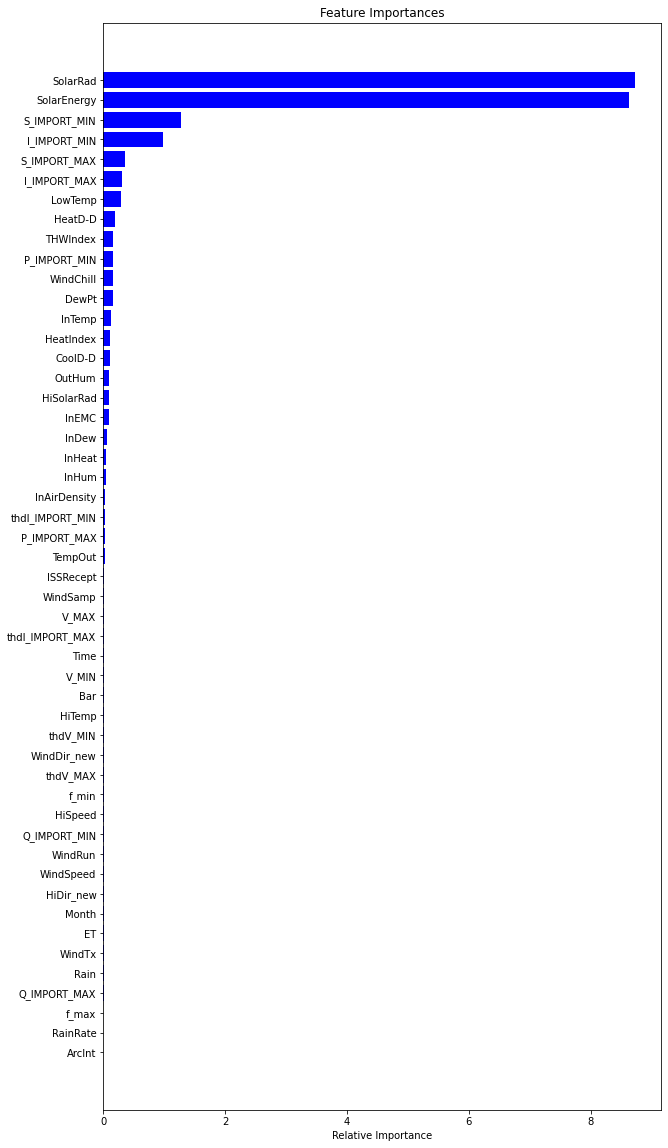

In [127]:
features = X.columns
importances = abs(grid.best_estimator_.named_steps['LR'].coef_[1:])
indices = np.argsort(importances)

plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 2. Calculating the model for weather data and PV data, first and second degree polynomial, lasso regression.

In [128]:
grid = GridSearchCV(Pipeline([('PolF', PolynomialFeatures()), ('lasso',Lasso(max_iter = 10000))]), 
                    param_grid = {'PolF__degree':[1,2], 'lasso__alpha':[0.0001,0.001,0.01]}, 
                    #param_grid = {'PolF__degree':[1,2]},
                    cv = 5, scoring = 'r2')
grid.fit(X_tr, y_train)
print(grid.best_params_)
gbs = grid.best_score_
print(f'The best score on training set: {gbs}')
trbs = r2_score(y_test, grid.predict(X_te))
print(f'Score on the test set: {trbs}')
print(grid.best_estimator_)
pd.DataFrame(grid.cv_results_)

C:\Users\macie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.28861236062442686, tolerance: 0.07680340272494172
  model = cd_fast.enet_coordinate_descent(
C:\Users\macie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11827299385463874, tolerance: 0.07981591000559583
  model = cd_fast.enet_coordinate_descent(
C:\Users\macie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10646643003266831, tolerance: 0.07680340272494172
  model = cd_fast.enet_coordinate_descent(
C:\Users\macie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Conve

{'PolF__degree': 2, 'lasso__alpha': 0.001}
The best score on training set: 0.948847496210535
Score on the test set: 0.9586064376080452
Pipeline(steps=[('PolF', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.001, max_iter=10000))])


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.922600      0.176924         0.000997        0.000631   
1       0.578085      0.062470         0.001166        0.000395   
2       0.266902      0.036944         0.000982        0.000020   
3      61.662497      1.486312         0.014361        0.000488   
4      24.610122      9.150158         0.017354        0.002326   
5      17.629846      8.596439         0.014761        0.002130   

  param_PolF__degree param_lasso__alpha  \
0                  1             0.0001   
1                  1              0.001   
2                  1               0.01   
3                  2             0.0001   
4                  2              0.001   
5                  2               0.01   

                                        params  split0_test_score  \
0  {'PolF__degree': 1, 'lasso__alpha': 0.0001}           0.910015   
1   {'PolF__degree': 1, 'lasso__alpha': 0.001}           0.907478   
2    {'PolF__degree': 1, 'lasso__alpha': 0.01}           0.899910   
3  {'PolF__degree': 2, 'lasso__alpha': 0.0001}           0.921909   
4   {'PolF__degree': 2, 'lasso__alpha': 0.001}           0.929166   
5    {'PolF__degree': 2, 'lasso__alpha': 0.01}           0.915525   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.896003           0.918951           0.938208           0.948994   
1           0.893259           0.919084           0.936759           0.948223   
2           0.878279           0.910151           0.934014           0.945736   
3           0.891259           0.959306           0.950272           0.953265   
4           0.936067           0.960581           0.955729           0.962694   
5           0.916763           0.939370           0.945981           0.958387   

   mean_test_score  std_test_score  rank_test_score  
0         0.922434        0.019074                4  
1         0.920960        0.019726                5  
2         0.913618        0.024068                6  
3         0.935202        0.025464                3  
4         0.948847        0.013620                1  
5         0.935205        0.016723                2

IndexError: index 579 is out of bounds for axis 0 with size 50

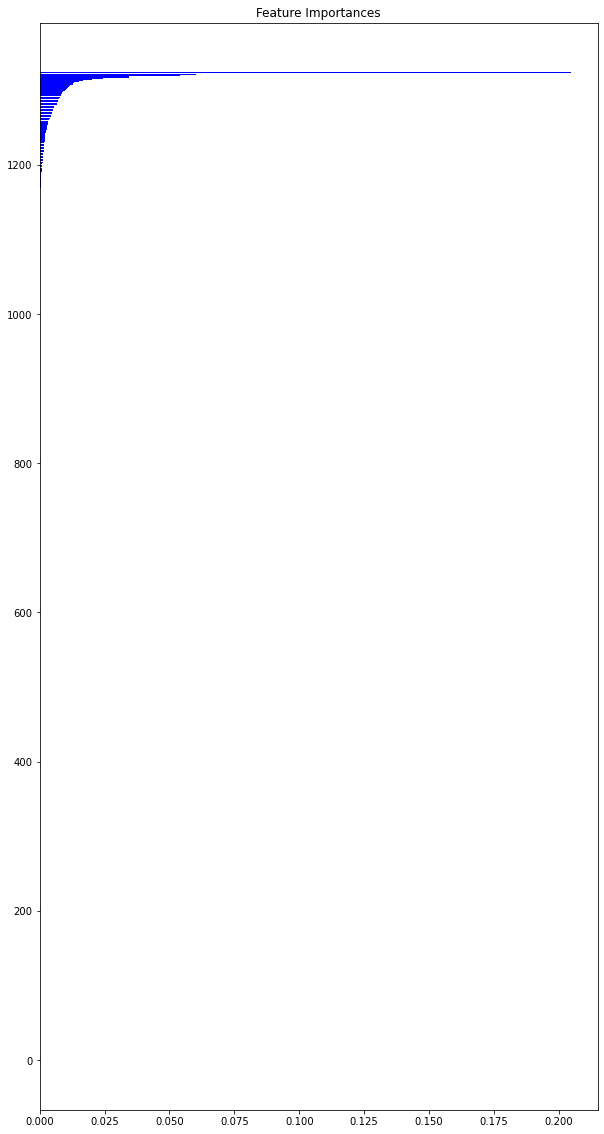

In [129]:
features = X.columns
importances = abs(grid.best_estimator_.named_steps['lasso'].coef_[1:])
indices = np.argsort(importances)

plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 3. Calculating the model for weather data and PV data, first and second degree polynomial, ridge regression.

In [130]:
grid = GridSearchCV(Pipeline([('PolF', PolynomialFeatures()), ('ridge',Ridge())]), 
                    param_grid = {'PolF__degree':[1,2], 'ridge__alpha':[1,10,100,500]}, 
                    #param_grid = {'PolF__degree':[1,2]},
                    cv = 5, scoring = 'r2')
grid.fit(X_tr, y_train)
print(grid.best_params_)
gbs = grid.best_score_
print(f'The best score on training set: {gbs}')
trbs = r2_score(y_test, grid.predict(X_te))
print(f'Score on the test set: {trbs}')
print(grid.best_estimator_)
pd.DataFrame(grid.cv_results_)

{'PolF__degree': 2, 'ridge__alpha': 100}
The best score on training set: 0.9408862767756162
Score on the test set: 0.951731620085683
Pipeline(steps=[('PolF', PolynomialFeatures()), ('ridge', Ridge(alpha=100))])


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.007587      0.001366         0.001234        0.000387   
1       0.006712      0.000856         0.001559        0.000731   
2       0.006152      0.000344         0.001527        0.000266   
3       0.005821      0.000130         0.001273        0.000109   
4       0.206646      0.006095         0.012567        0.000489   
5       0.208642      0.008063         0.013564        0.002239   
6       0.206846      0.003065         0.013964        0.002275   
7       0.213229      0.007761         0.014960        0.002821   

  param_PolF__degree param_ridge__alpha  \
0                  1                  1   
1                  1                 10   
2                  1                100   
3                  1                500   
4                  2                  1   
5                  2                 10   
6                  2                100   
7                  2                500   

                                     params  split0_test_score  \
0    {'PolF__degree': 1, 'ridge__alpha': 1}           0.910386   
1   {'PolF__degree': 1, 'ridge__alpha': 10}           0.909256   
2  {'PolF__degree': 1, 'ridge__alpha': 100}           0.906363   
3  {'PolF__degree': 1, 'ridge__alpha': 500}           0.900757   
4    {'PolF__degree': 2, 'ridge__alpha': 1}           0.903636   
5   {'PolF__degree': 2, 'ridge__alpha': 10}           0.914683   
6  {'PolF__degree': 2, 'ridge__alpha': 100}           0.920517   
7  {'PolF__degree': 2, 'ridge__alpha': 500}           0.906378   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.895575           0.918462           0.938602           0.949254   
1           0.895666           0.919447           0.937879           0.949175   
2           0.893250           0.917977           0.936035           0.948817   
3           0.885881           0.912227           0.930965           0.944768   
4         -11.725891           0.947178           0.931821           0.943372   
5           0.920510           0.956474           0.945951           0.948168   
6           0.926876           0.957730           0.946855           0.952455   
7           0.909446           0.951342           0.942327           0.954187   

   mean_test_score  std_test_score  rank_test_score  
0         0.922456        0.019303                4  
1         0.922285        0.019249                5  
2         0.920488        0.019960                6  
3         0.914920        0.020973                7  
4        -1.599977        5.062980                8  
5         0.937157        0.016456                2  
6         0.940886        0.014590                1  
7         0.932736        0.020667                3

IndexError: index 1069 is out of bounds for axis 0 with size 50

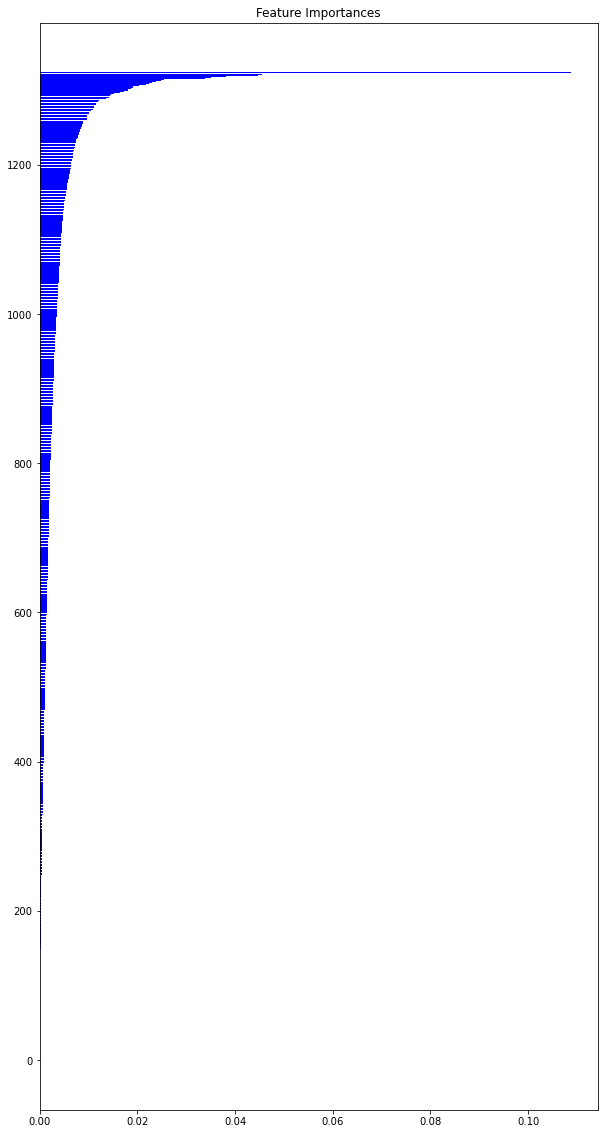

In [132]:
features = X.columns
importances = abs(grid.best_estimator_.named_steps['ridge'].coef_[1:])
indices = np.argsort(importances)

plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 4. Calculating the model for weather data and PV data, Random Forest Regressor.

In [143]:
#X = dg.drop(columns=['Site','datetime','P_GEN_MIN', 'P_GEN_MAX', 'WindDir', 'HiDir'])

X = dg.drop(columns=['Site','datetime', 'WindDir', 'HiDir', 
                     
                     'I_GEN_MIN','I_GEN_MAX', 
                     
                     'P_GEN_MIN', 'P_GEN_MAX',
                      
                     'Q_GEN_MIN', 'Q_GEN_MAX',
                      
                     'S_GEN_MIN', 'S_GEN_MAX',
                      
                      
                     'thdI_GEN_MIN','thdI_GEN_MAX', 
                      
                    ])                    
y = dg['P_GEN_MAX']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [149]:
grid = GridSearchCV(Pipeline([('RFR', RandomForestRegressor(random_state = 42))]), 
                    param_grid = {'RFR__n_estimators':[100,200], 'RFR__max_depth':[20,40,60,80]}, 
                    #param_grid = {'PolF__degree':[1,2]},
                    cv = 5, scoring = 'r2')
grid.fit(X_train, y_train)
print(grid.best_params_)
gbs = grid.best_score_
print(f'The best score on training set: {gbs}')
trbs = r2_score(y_test, grid.predict(X_test))
print(f'Score on the test set: {trbs}')
print(grid.best_estimator_)
pd.DataFrame(grid.cv_results_)

{'RFR__max_depth': 60, 'RFR__n_estimators': 100}
The best score on training set: 0.9444024964182451
Score on the test set: 0.9638776336774061
Pipeline(steps=[('RFR', RandomForestRegressor(max_depth=60, random_state=42))])


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.671738      0.338541         0.020878        0.002727   
1      17.718971      0.273248         0.043654        0.003387   
2      10.368468      0.193793         0.025264        0.003351   
3      21.409273      0.718227         0.046885        0.004895   
4      10.304695      0.178286         0.023570        0.002731   
5      20.282680      0.468045         0.043876        0.004109   
6       9.551090      0.249321         0.023577        0.004032   
7      19.182930      0.471032         0.042226        0.001300   

  param_RFR__max_depth param_RFR__n_estimators  \
0                   20                     100   
1                   20                     200   
2                   40                     100   
3                   40                     200   
4                   60                     100   
5                   60                     200   
6                   80                     100   
7                   80                     200   

                                             params  split0_test_score  \
0  {'RFR__max_depth': 20, 'RFR__n_estimators': 100}           0.917309   
1  {'RFR__max_depth': 20, 'RFR__n_estimators': 200}           0.915469   
2  {'RFR__max_depth': 40, 'RFR__n_estimators': 100}           0.917422   
3  {'RFR__max_depth': 40, 'RFR__n_estimators': 200}           0.916061   
4  {'RFR__max_depth': 60, 'RFR__n_estimators': 100}           0.917539   
5  {'RFR__max_depth': 60, 'RFR__n_estimators': 200}           0.916226   
6  {'RFR__max_depth': 80, 'RFR__n_estimators': 100}           0.917524   
7  {'RFR__max_depth': 80, 'RFR__n_estimators': 200}           0.916219   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.919359           0.952309           0.959565           0.972875   
1           0.920125           0.952114           0.958900           0.973157   
2           0.919289           0.952557           0.960302           0.972403   
3           0.919617           0.952133           0.959418           0.973105   
4           0.919071           0.952759           0.960212           0.972431   
5           0.919597           0.952207           0.959369           0.973136   
6           0.919071           0.952759           0.960212           0.972431   
7           0.919597           0.952207           0.959369           0.973136   

   mean_test_score  std_test_score  rank_test_score  
0         0.944283        0.022200                4  
1         0.943953        0.022459                8  
2         0.944395        0.022190                3  
3         0.944067        0.022477                7  
4         0.944402        0.022220                1  
5         0.944107        0.022447                5  
6         0.944399        0.022224                2  
7         0.944106        0.022449                6

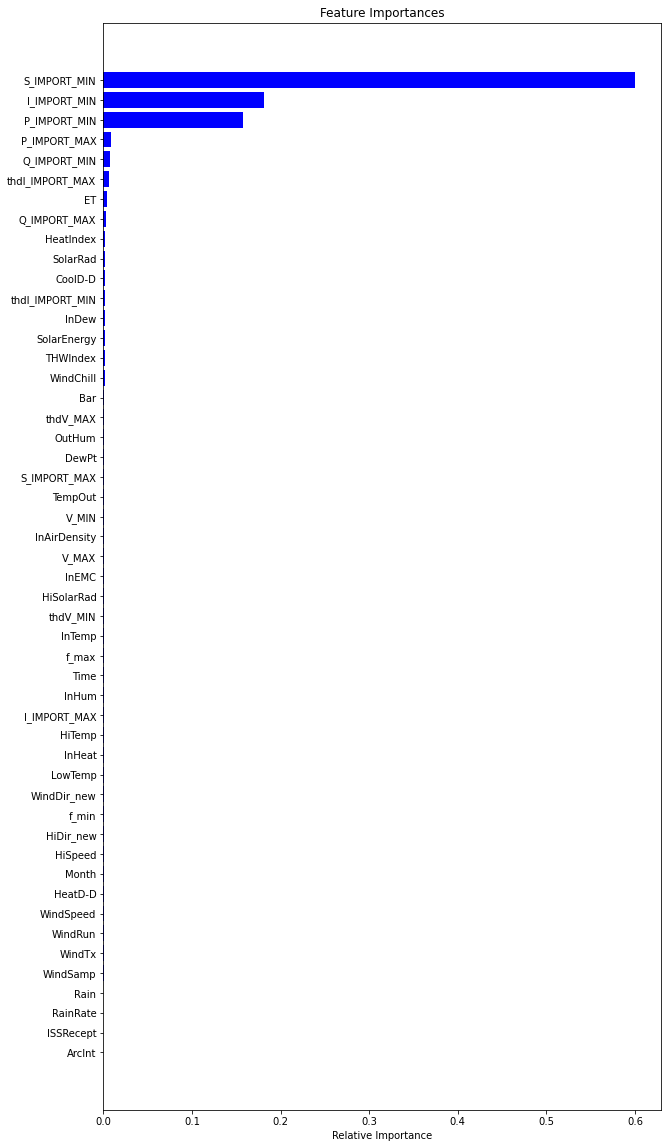

In [150]:
features = X.columns
importances = grid.best_estimator_.named_steps['RFR'].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 5. Calculating the model for weather data and PV data, MLPRegressor.

In [151]:
?MLPRegressor

In [153]:
grid = GridSearchCV(Pipeline([('sc',StandardScaler()),('MLPR', MLPRegressor(random_state = 42))]), 
                    param_grid = {'MLPR__hidden_layer_sizes':[(100,20),(100,50)], 'MLPR__max_iter':[100,200]}, 
                    #param_grid = {'PolF__degree':[1,2]},
                    cv = 5, scoring = 'r2')
grid.fit(X_train, y_train)
print(grid.best_params_)
gbs = grid.best_score_
print(f'The best score on training set: {gbs}')
trbs = r2_score(y_test, grid.predict(X_test))
print(f'Score on the test set: {trbs}')
print(grid.best_estimator_)
pd.DataFrame(grid.cv_results_)

{'MLPR__hidden_layer_sizes': (100, 20), 'MLPR__max_iter': 100}
The best score on training set: 0.9285171593015857
Score on the test set: 0.9425183586793241
Pipeline(steps=[('sc', StandardScaler()),
                ('MLPR',
                 MLPRegressor(hidden_layer_sizes=(100, 20), max_iter=100,
                              random_state=42))])


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.874819      0.548878         0.003439        0.002817   
1       2.877245      0.538065         0.004221        0.006083   
2       2.853860      0.550054         0.007092        0.004982   
3       2.837741      0.509205         0.009176        0.004679   

  param_MLPR__hidden_layer_sizes param_MLPR__max_iter  \
0                      (100, 20)                  100   
1                      (100, 20)                  200   
2                      (100, 50)                  100   
3                      (100, 50)                  200   

                                              params  split0_test_score  \
0  {'MLPR__hidden_layer_sizes': (100, 20), 'MLPR_...           0.907881   
1  {'MLPR__hidden_layer_sizes': (100, 20), 'MLPR_...           0.907881   
2  {'MLPR__hidden_layer_sizes': (100, 50), 'MLPR_...           0.902840   
3  {'MLPR__hidden_layer_sizes': (100, 50), 'MLPR_...           0.902840   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.902195           0.941710           0.943188           0.947612   
1           0.902195           0.941710           0.943188           0.947612   
2           0.833096           0.939486           0.939026           0.941214   
3           0.833096           0.939486           0.939026           0.941214   

   mean_test_score  std_test_score  rank_test_score  
0         0.928517        0.019353                1  
1         0.928517        0.019353                1  
2         0.911132        0.041582                3  
3         0.911132        0.041582                3

# Summary and conclusions:
 - According to the UK Power Networks final report: https://www.ofgem.gov.uk/ofgem-publications/93938/pvtoolcdrfinal-pdf the biggest impact on power generation from PV have time of the year, time of the day, solar radiation and panel orientation. There have been also noticed an effect of overheating when PV generators efficiency decreases. In the result the higher power generation was observed during cloudy days than during the sunny days, when the generator had time to cool down when the sun was coverd with clouds.   
 - Panel orientation data were not avaliable among the data set so could not be verified in this project.
 - The model performed only for weather data, using linear regression had best **r2** score for first degree polynomial, **70.9%** and **71.5%** for training and test data respectively.
 - According to this model **the five most important weather features** in case of PV power generation are: **SolarEnergy, SolarRad, LowTemp, WindChill and HeatIndex (the description of features names is avaliable in the file Data_preparation.docx)**.
 - The best scored linear regression model was used to verifiy using also PV data in the model. 
 - Every pair of features like '...MIN..' and '...MAX...' was added to the model weather data set and the score of the model(linear regression, first degree polynomial)was compared to the model only with weather data. For some pairs of features related to the generator (including **'GEN'** in the name) the score for both training and test data was above **99%** which suggests that this features are more result of power generation than have impact on its production. Eventually all features with **'GEN' were not included into calculations**.
 - The linear regression model was performed for data set including weather data and the rest of PV data. The best scores were achived for **linear regression (first degree polynomial): r2 scores were r2_tr 91.0% and r2_ts 92.9%** for training and test data respectively, **lasso regression(second degree polynomial, alfa 0.001): r2_tr 94.9% and r2_ts 95.9%, ridge regression(second degree polynomial, alfa 100): r2_tr 94.1%, r2_ts 95.2%**. **For linear regression the first five most important features were: SolarRad, SolarEnergy, S_IMPORT_MIN, I_IMPORT_MIN, S_IMPORT_MAX**, for secodnd degree polynomial it could not be determined.
 - According to **Random Forest Regressor** the best **r2** scores were achived for **max_depth: 60 and n_estimators: 100 and were r2_tr 94.4%, r2_ts 96.4%. The five most important features according to this model were: S_IMPORT_MIN, I_IMPORT_MIN, P_IMPORT_MIN, P_IMPORT_MAX, Q_IMPORT_MIN**.
 - According to **MLPRegressor** the best **r2** scores were achived for **hidden_layer_sizes: (100,20) and max_iter: 100 and were r2_tr 92.8%, r2_ts 94.2%**. Feature importance could not be determined in this case. 
 - **Including PV data into the model improves significantly the model fit and hence some network parameters have significant impact on PV power generation.** 
 - **Comparing fearture importance analysis for linear regression and for random forest regresor S_IMPORT_MIN, I_IMPORT_MIN were among the five most important features in both models and beside SolarRad, SolarEnergy may have significant impact on power generation from PV.**
 - **Based on both r2 score and feature importance analysis linear regression might be a better choice for a model beacuse it scored very high both SolarRad, SolarEnergy as well as S_IMPORT_MIN, I_IMPORT_MIN. It is indisputable that sun should impact the most PV power generatiion.**  

In [155]:
?MLPRegressor